# Lab | Comparing regression models

For this lab, we will be using the same dataset for the customer analysis case study we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

## Instructions

In this lab, we will model our data. Import sklearn train_test_split and separate the data.
Try a simple linear regression with all the data to see whether we are getting good results.
Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
Use the function to check LinearRegressor,Lasso,Ridge and KNeighborsRegressor.
Use feature selection techniques to select subset of features to train the model with(if necessary).
Check and discuss the results.

# Libraries

In [8]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
from ipywidgets import interactive
import ipywidgets as widgets
from numpy import random
#import getpass #just needed for sql import
#import sqlalchemy as sa #just needed for sql import
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999
from matplotlib import pyplot
from numpy import sqrt
from numpy import log

# Pipeline
Functions & Pipeline

In [2]:
#cleaning the state names
def st_clean(x):
    if not x == x:
    #then i know that x is = none
        return x
    else:
        states= {'Arizona' : 'AZ', 
                 'California': 'CA',
                 'Nevada' : 'NV', 
                 'Cali' :'CA,', 
                 'Oregon':'OR', 
                 'AZ' :'AZ', 
                 'WA':'WA',
                 'Washington':'WA',
                 'Cali':'CA'}
        
        return states[x]
    

In [3]:
#cleaning the gender names
def gender_clean(x):
    if not x == x:
    #then i know that x is = none
        return x
    else:
        g = {'F': 'F', 
                 'M' : 'M', 
                 'Femal': 'F',
                 'Male' : 'M', 
                 'female' :'F'}
        
        return g[x]


In [4]:
#change states into regions
def state_region(x):
    if not x == x:
    #then i know that x is = none
        return x
    else:
        region= {'AZ': 'Central', 
                  'CA': 'West',
                 'NV': 'Central', 
                 'OR':'North_West', 
                  'AZ':'Central', 
                 'WA':'East'}
        
        return region[x]

In [5]:
# loading csv into dataframe
def load_data(path):
    return pd.read_csv(path)

#cleaning

def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns] #all columns in lower case
    df=df.drop(columns=['unnamed:_0', 'vehicle_type',"customer"]) #dropping useless columns
    #df=df[df['income']>0]
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce') # change format of date
    df["month"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"])) #get frm effective_to_date just the months
    df=df.drop(columns=['effective_to_date']) #dropping not anymore needed column
    df["state"] = df["state"].apply(st_clean)
    df["gender"] = df["gender"].apply(gender_clean)
    df =df.drop_duplicates()
    df['customer_lifetime_value'].fillna(df["customer_lifetime_value"].mean(),inplace=True) # filling empty cells with the mean
    df['income'].fillna(df["income"].mean(),inplace=True)
    df['monthly_premium_auto'].fillna(df["monthly_premium_auto"].mean(),inplace=True)
    df['total_claim_amount'].fillna(df["total_claim_amount"].mean(),inplace=True)
    df['number_of_open_complaints'].fillna(df["number_of_open_complaints"].mean(),inplace=True)
    df =df.dropna() #drop if any cell is empty
    df = df.reset_index(drop=True) #reset index
    return df

def transform_data(df):
    df["total_claim_amount"]=round(df["total_claim_amount"],0) #remove decimals
    df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0) #remove decimals
    df["number_of_open_complaints"]=round(df['number_of_open_complaints'],0) #remove decimals
    df["state"] = df["state"].apply(state_region) # change states into region
    df.vehicle_class[df.vehicle_class.isin(["Luxury Car","Luxury SUV"])] = "Luxury Car"
    df.vehicle_class[df.vehicle_class.isin(["Four-Door Car","SUV"])] = "Four-Door Car"
    df.policy[df.policy.isin(["Personal L3","Personal L2","Personal L1"]) ] = "Personal"
    df.policy[df.policy.isin(["Corporate L3","Corporate L2","Corporate L1"]) ] = "Corporate"
    df.policy[df.policy.isin(["Special L3","Special L2","Special L1"]) ] = "Special"
    df.number_of_policies[df.number_of_policies>2]=3
    return df

In [9]:
cs_study =load_data("/Users/edudarrelljockers/Documents/GitHub/IH_RH_DA_FT_OCT_2021_Labs_Activities_Solutions/Labs_Solutions/Case_Studies/Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round2.csv")

In [10]:
cs_study = clean_data(cs_study)
cs_study = transform_data(cs_study)

<ipython-input-5-d09e949d7523>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.vehicle_class[df.vehicle_class.isin(["Luxury Car","Luxury SUV"])] = "Luxury Car"
<ipython-input-5-d09e949d7523>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.vehicle_class[df.vehicle_class.isin(["Four-Door Car","SUV"])] = "Four-Door Car"
<ipython-input-5-d09e949d7523>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.policy[df.policy.isin(["Pe

In [12]:
cs_study.head(3)

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,Central,4809.0,No,Basic,College,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,3,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize,February
1,West,2229.0,No,Basic,College,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal,Offer4,Call Center,745.0,Four-Door Car,Medsize,January
2,East,14948.0,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize,February


In [13]:
cs_study.to_csv("cs_study_clean.csv")

In [14]:
cs_study.isnull().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
month                            0
dtype: int64

# Plot the Correlation Heatmap.

<AxesSubplot:>

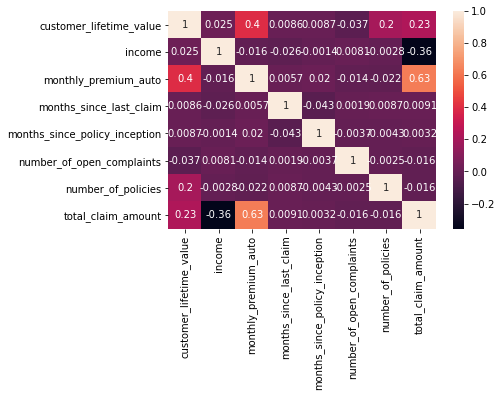

In [15]:
Var_Corr = cs_study.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr,annot=True)

# Statistic Tasks
## Examine the columns' data types.
Get the numerical data into a dataframe named numericals, and the categorical data into a dataframe called categoricals. (To pick numerical and categorical data types, use np.number and np.object, respectively.)

In [16]:
numerical= cs_study.select_dtypes(include=np.number)
numerical.head(2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.0,48029,61,7.0,52,0.0,3,293.0
1,2229.0,0,64,3.0,26,0.0,1,745.0


In [17]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8971 entries, 0 to 8970
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        8971 non-null   float64
 1   income                         8971 non-null   int64  
 2   monthly_premium_auto           8971 non-null   int64  
 3   months_since_last_claim        8971 non-null   float64
 4   months_since_policy_inception  8971 non-null   int64  
 5   number_of_open_complaints      8971 non-null   float64
 6   number_of_policies             8971 non-null   int64  
 7   total_claim_amount             8971 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 560.8 KB


In [18]:
categorical = cs_study.select_dtypes(include=object)
categorical.head(2)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month
0,Central,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate,Offer3,Agent,Four-Door Car,Medsize,February
1,West,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal,Offer4,Call Center,Four-Door Car,Medsize,January


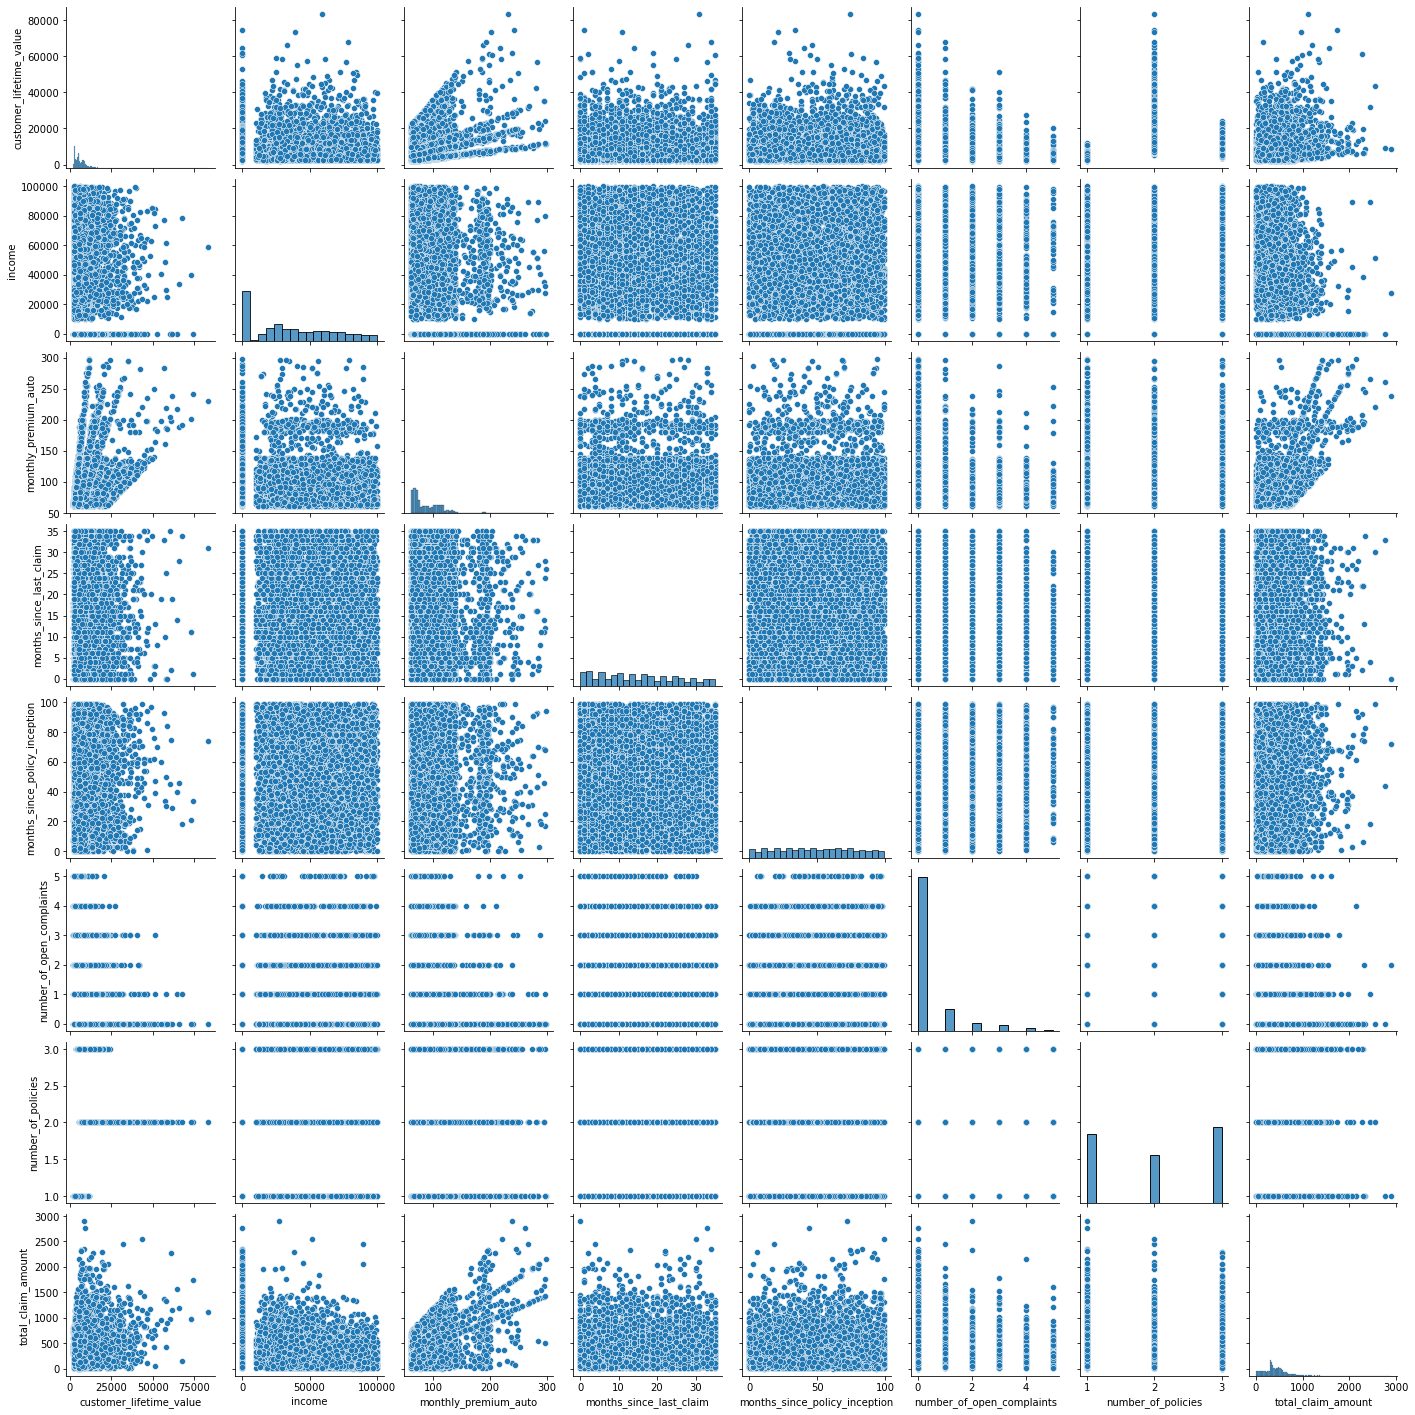

In [19]:
#Create distribution graphs for the numerical variables using the seaborn library.
sns.pairplot(numerical)
plt.show()

# Normalize (numericals)

In [20]:
#z-scale
x = numerical.values #returns a numpy array
numerical_normalized=StandardScaler().fit_transform(x)
numerical_normalized =pd.DataFrame(numerical_normalized, columns = numerical.columns) # convert to dataframe with column names
numerical_normalized.head(2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,-0.465260,0.341247,-0.937002,-0.803724,0.141352,-0.423521,1.111832,-0.484056
1,-0.840939,-1.237094,-0.849684,-1.200663,-0.790051,-0.423521,-1.201841,1.068931


In [23]:
#min-max-scaler
#from sklearn import preprocessing

#x = numerical.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#numerical_normalized = pd.DataFrame(x_scaled, columns = numerical.columns)
#numerical_normalized

In [25]:
numerical.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000
mean,8004.197748,37644.828113,93.192621,15.099209,48.054175,0.385241,2.038903,433.885520
std,6867.940484,30431.741597,34.358960,10.077668,27.916442,0.909666,0.864474,291.068317
min,1898.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3999.500000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,270.500000
50%,5792.000000,33947.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.000000
75%,8954.500000,62365.500000,109.000000,23.000000,71.000000,0.000000,3.000000,548.000000
max,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,3.000000,2893.000000


# Multicollinearity between numerical features.
Please keep in mind that the column total claim amount will be used as the target variable later on.

In [28]:
correlations = numerical.corr()
print(correlations)

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.025332   
income                                        0.025332  1.000000   
monthly_premium_auto                          0.398702 -0.016478   
months_since_last_claim                       0.008610 -0.026008   
months_since_policy_inception                 0.008715 -0.001438   
number_of_open_complaints                    -0.037128  0.008091   
number_of_policies                            0.200735 -0.002846   
total_claim_amount                            0.227520 -0.355948   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.398702                 0.008610   
income                                    -0.016478                -0.026008   
monthly_premium_auto                       1.000000                 0.005730   
months_since_last_claim                    0.005730                

In [30]:
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(numerical.corr())
mask[np.triu_indices_from(mask)]=True
#fig, ax=plt.subplots(figsize=(10, 8))
#ax=sns.heatmap(numerical.corr(), mask=mask, annot=True,cmap=cmap)
#plt.show()

1. Drop one of the two characteristics that have a high connection between them (greater than 0.9). Create code for both the correlation matrix and the seaborn heatmap. If there is no pair of features with a strong correlation, then no features should be dropped.

#no strong correlation found

# Processing Data
X-y split., Normalize (numerical). (done), One Hot/Label Encoding (categorical)., Concat DataFrames

X-y split.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
numerical_normalized.head(2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,-0.465260,0.341247,-0.937002,-0.803724,0.141352,-0.423521,1.111832,-0.484056
1,-0.840939,-1.237094,-0.849684,-1.200663,-0.790051,-0.423521,-1.201841,1.068931


One Hot/Label Encoding (categorical) --> pd.dummies faster

In [32]:
categorical_numerical =pd.get_dummies(categorical)

# Linear Regression
Train-test split., Apply linear regression.

In [34]:
x = numerical_normalized.drop('total_claim_amount', axis =1)
y =  numerical_normalized["total_claim_amount"]
#x = independent variable
#y = dependent variable

In [35]:
#x_train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 10)
#test_size = percentage we keep to test, here 30%
#random_state = 10 --> keep the random numbers and not generating everytime new ones

In [39]:
#predicted_y
lm = LinearRegression()
model = lm.fit(x_train,y_train)
predicted_y = model.predict(x_test)

In [40]:
#predicted_train_y
predicted_train_y = model.predict(x_train)

In [41]:
print(model.coef_)
print()
print(model.intercept_)

[-2.39628087e-02 -3.53100426e-01  6.52088262e-01 -1.16373087e-02
 -1.83925636e-02 -4.30786254e-04  3.31042449e-03]

0.002919167954444103


Text(0.5, 1.0, 'Train Residual histogram')

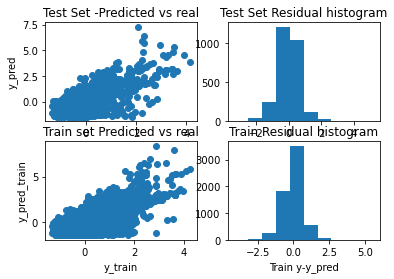

In [42]:
# Create a scatter plot of y pred against y.
# What type of plot will you receive if all of your forecasts are correct?
# A clear line

fig, ax = plt.subplots(2,2)
ax[0,0].plot(predicted_y, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Obtain a histogram of the residuals, i.e. y - y pred.  Homoscdasticity
# Is it similar to a normal distribution?
ax[0,1].hist(y_test - predicted_y)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(predicted_train_y, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Obtain a histogram of the residuals, i.e. y - y pred.  Homoscdasticity
# Is it similar to a normal distribution?
ax[1,1].hist(y_train - predicted_train_y)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

# Validation of models

In [43]:
#mse (Mean Squared Error) is the difference between the original and forecasted values calculated by squared the average difference across the data set.
mse= mean_squared_error(y_test, predicted_y)
mse

0.4681306336704934

In [44]:
#rmse RMSE (Root Mean Squared Error) is the error rate calculated by taking the square root of MSE.
rmse = sqrt(mse)
rmse

0.6842007261546084

In [45]:
#mae (Mean absolute error) The difference between the original and anticipated values is represented by MAE, which is calculated by averaging the absolute difference over the data set.
from sklearn.metrics import mean_absolute_error as mae
mae = mae(y_test, predicted_y)
mae

0.49137772393779505

In [46]:
#r2 = model.score(x_test,y_test) (Coefficient of determination) is the coefficient that reflects how well the values match in comparison to the original values. Percentages are assigned to values ranging from 0 to 1. The greater the value, the better the model.
from sklearn.metrics import r2_score
r2_score(y_test, predicted_y)

0.48315126937581065

In [49]:
#r2 another formula is=  model.score(x_test,y_test)
r2 =model.score(x_test,y_test)
r2

0.48315126937581065

In [50]:
#adjusted R2 score
N=x_train.shape[0]
p=len(x.columns) # number of variables used
a = (1-r2)
b = (N-1) / (N-p-1)
adj_rsquared = (1 - (a * b))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.4825743372893222


# Importance of Feature
Using modified R squared, determine the relevance of each variable in your model.

In [51]:
features_importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.coef_
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [52]:
features_importances

,Attribute,Importance
2,monthly_premium_auto,0.652088
6,number_of_policies,0.003310
5,number_of_open_complaints,-0.000431
3,months_since_last_claim,-0.011637
4,months_since_policy_inception,-0.018393
0,customer_lifetime_value,-0.023963
1,income,-0.353100


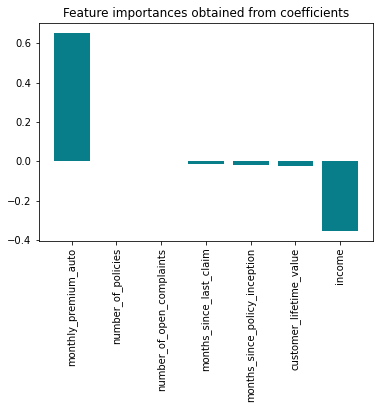

In [53]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients')
plt.xticks(rotation='vertical')
plt.show()

### A function that accepts a list of models and trains (and tests) them.

In [54]:
def train_test(df, dependent_column):
    
    data = df.select_dtypes(include=np.number)
    
    data = data.drop(dependent_column, axis =1)
    y =  df[dependent_column]

    #standardizing
    scaler = StandardScaler()
    scaler.fit(data) #z score 
    x = scaler.transform(data) #gives an array
    x = pd.DataFrame(x, columns = data.columns) #transform it to a df
    display(data.head(2))
    print()
    display(x.head(2))
    
    # test_train
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 10)
    
    lm = LinearRegression()
    model = lm.fit(x_train,y_train)
    predicted_y = model.predict(x_test)
    predicted_train_y = model.predict(x_train)
    print("Coefficient: ", model.coef_)
    print()
    print("Intercept: ", model.intercept_)
    print()
    #r2
    print("r2: ", model.score(x_test,y_test))

In [55]:
train_test(cs_study,'total_claim_amount')

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809.0,48029,61,7.0,52,0.0,3
1,2229.0,0,64,3.0,26,0.0,1


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.465260,0.341247,-0.937002,-0.803724,0.141352,-0.423521,1.111832
1,-0.840939,-1.237094,-0.849684,-1.200663,-0.790051,-0.423521,-1.201841


Coefficient:  [-6.97442564e+00 -1.02770618e+02  1.89791654e+02 -3.38706306e+00
 -5.35319413e+00 -1.25381241e-01  9.63505981e-01]

Intercept:  434.7351499542117

r2:  0.48315126937581077
